<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/PCA_on_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Spark + import lib + start spark session

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [68.5 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [2]:
#Get Install the Java Development Kit
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Get Spark lib -- address need to be change according to the current version of Spark: https://downloads.apache.org/spark/
!wget -q http://apache.osuosl.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
#Unzip th Spark
!tar xf spark-3.0.3-bin-hadoop3.2.tgz
#install findspark for Python
!pip install -q findspark
#Install extra lib(s)
!pip install -q xlrd
!pip install -q kaggle
!pip install -q kora

#import and set environment for spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

import kora
import pandas as pd

import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import *

SPARK_URL = "local[*]"

spark = SparkSession.builder.master(SPARK_URL).getOrCreate()

# Check the pyspark version
import pyspark
print(pyspark.__version__)

     |████████████████████████████████| 57 kB 3.7 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
3.0.3


In [3]:
input_path = '/content/digits.csv'

data = spark.read.csv(input_path, header=True, inferSchema=True)
data.show()

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

In [43]:
from pyspark import SparkContext, SparkConf
from pyspark.ml.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=data.columns[1:], outputCol='features')
data_3 = assembler.setHandleInvalid("skip").transform(data)

In [44]:
data_2.show()

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

In [40]:
from pyspark.ml.feature import PCA
pca = PCA(k=3, inputCol='features', outputCol='features_pca')

In [45]:
pca_model = pca.fit(data_3)

In [58]:
pca_data = pca_model.transform(data_3).select('label','features_pca')

In [59]:
pca_data.show(20,False)

+-----+------------------------------------------------------------+
|label|features_pca                                                |
+-----+------------------------------------------------------------+
|1    |[167.8509010613917,574.1050506778648,-455.29812817422624]   |
|0    |[2488.427149496568,57.24803354178608,529.3317225735503]     |
|1    |[-92.4936253327713,170.64945896677577,-344.87882649995686]  |
|4    |[569.428745496407,-308.59538633262196,-89.08817374340143]   |
|0    |[2707.0327397679457,83.49535995138086,637.4235922468416]    |
|0    |[1152.3806960015725,-377.554640879856,-102.1187926809642]   |
|7    |[-23.368825275560607,-478.49799026322705,288.49531202468273]|
|3    |[586.1667058086658,-75.94916394312918,270.67899776362555]   |
|5    |[944.642607024112,-371.1343823394471,54.85829118585885]     |
|3    |[1112.3496589869492,592.2210837652992,-261.9136384021302]   |
|8    |[822.2144297729719,-839.4949969311011,-572.9340262289835]   |
|9    |[283.67539981128857,-651.05

In [60]:
pca_data.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features_pca: vector (nullable = true)



In [61]:
print(pca_model.explainedVariance)

[0.09731054661523633,0.07480549963262523,0.06041861558774705]


In [62]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    # Important: asNondeterministic requires Spark 2.3 or later
    # It can be safely removed i.e.
    # return udf(to_array_, ArrayType(DoubleType()))(col)
    # but at the cost of decreased performance
    return udf(to_array_, ArrayType(DoubleType())).asNondeterministic()(col)

pca_data=(pca_data
    .withColumn("PCA", to_array(col("features_pca")))
    .select(["label"] + [col("PCA")[i] for i in range(3)]))

pca_data.show()

+-----+-------------------+-------------------+-------------------+
|label|             PCA[0]|             PCA[1]|             PCA[2]|
+-----+-------------------+-------------------+-------------------+
|    1|  167.8509010613917|  574.1050506778648|-455.29812817422624|
|    0|  2488.427149496568|  57.24803354178608|  529.3317225735503|
|    1|  -92.4936253327713| 170.64945896677577|-344.87882649995686|
|    4|   569.428745496407|-308.59538633262196| -89.08817374340143|
|    0| 2707.0327397679457|  83.49535995138086|  637.4235922468416|
|    0| 1152.3806960015725|  -377.554640879856| -102.1187926809642|
|    7|-23.368825275560607|-478.49799026322705| 288.49531202468273|
|    3|  586.1667058086658| -75.94916394312918| 270.67899776362555|
|    5|   944.642607024112| -371.1343823394471|  54.85829118585885|
|    3| 1112.3496589869492|  592.2210837652992| -261.9136384021302|
|    8|  822.2144297729719| -839.4949969311011| -572.9340262289835|
|    9| 283.67539981128857| -651.0522924581425| 

In [63]:
pca_data.printSchema()

root
 |-- label: integer (nullable = true)
 |-- PCA[0]: double (nullable = true)
 |-- PCA[1]: double (nullable = true)
 |-- PCA[2]: double (nullable = true)



In [64]:
pandasDF = pca_data.toPandas()
print(pandasDF)

      label       PCA[0]       PCA[1]      PCA[2]
0         1   167.850901   574.105051 -455.298128
1         0  2488.427149    57.248034  529.331723
2         1   -92.493625   170.649459 -344.878826
3         4   569.428745  -308.595386  -89.088174
4         0  2707.032740    83.495360  637.423592
...     ...          ...          ...         ...
1136      8   711.733846  -136.263865  136.552864
1137      3   229.400726   -80.236804 -461.400000
1138      4   848.890670 -1201.089521 -339.001871
1139      9   -52.976739  -181.539786 -367.249473
1140      2  1721.450386   614.594726 -821.409068

[1141 rows x 4 columns]


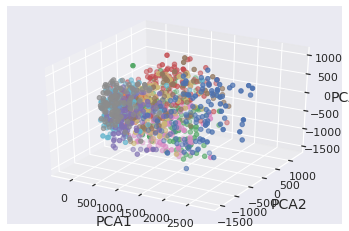

In [65]:
import numpy as np
import numba
import pandas as pd
import scipy.special
import scipy.stats as st

# Package to perform PCA
import sklearn.datasets
import sklearn.decomposition

# BE/Bi 103 Utilities from Justin
# import bebi103

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

# Make Matplotlib plots appear inline
%matplotlib inline

import bokeh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['indigo','b', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(pandasDF.loc[pandasDF['label'] == clas, 'PCA[0]'],
               pandasDF.loc[pandasDF['label'] == clas, 'PCA[1]'],
               pandasDF.loc[pandasDF['label'] == clas, 'PCA[2]'],
               ) 
      
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()